Learned Q-Table (Optimal Action Values):

             Test A    Test B
Healthy    6.225023  4.466558
Low Risk   4.915188  4.228978
High Risk  4.049400  5.126366


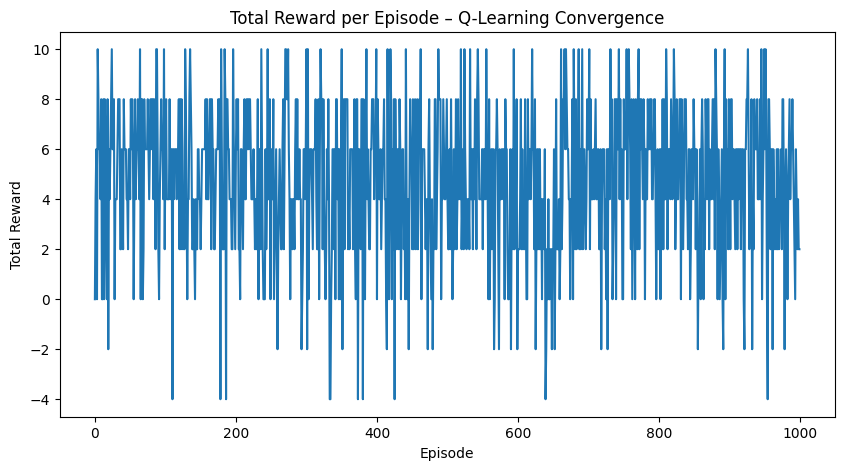


Learned Optimal Policy (Sequential Diagnosis Decisions):
{0: 'Test A', 1: 'Test A', 2: 'Test B'}


In [1]:
# ============================================================
# Experiment 9: Disease Risk Diagnosis Using Reinforcement Learning
# ============================================================

# 1.1 Aim:
# Diagnose disease risk using reinforcement learning for sequential decision-making.

# 1.2 Lab Outcome:
# Apply RL to analyze sequential healthcare decision-making.

# 1.3 Learning Outcome:
# Learn and interpret patient risk diagnosis policies through RL.

# ============================================================
# Step 1: Import Required Libraries
# ============================================================

import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# ============================================================
# Step 2: Define Synthetic Patient Environment
# ============================================================

class PatientEnv:
    """
    Simplified healthcare environment for sequential diagnosis.
    States: Patient health status encoded as integers (0=healthy, 1=low risk, 2=high risk)
    Actions: Diagnostic tests or interventions (0=test A, 1=test B)
    Rewards: +1 for correct diagnosis, -1 for incorrect, 0 otherwise
    """
    def __init__(self):
        self.states = [0, 1, 2]  # patient states
        self.actions = [0, 1]    # diagnostic tests
        self.state = 0           # initial state
    
    def reset(self):
        self.state = random.choice(self.states)
        return self.state
    
    def step(self, action):
        """
        Apply action and return next state, reward, done
        """
        # Define state transition probabilities (synthetic)
        transition = {
            0: [0.7, 0.3, 0.0],  # from healthy
            1: [0.1, 0.6, 0.3],  # from low risk
            2: [0.0, 0.2, 0.8]   # from high risk
        }
        self.state = np.random.choice(self.states, p=transition[self.state])
        
        # Reward system (synthetic)
        if (self.state == 2 and action == 1) or (self.state != 2 and action == 0):
            reward = 1  # correct decision
        else:
            reward = -1  # wrong decision
        
        done = False  # we can define episode length externally
        return self.state, reward, done

# ============================================================
# Step 3: Initialize Q-Learning Parameters
# ============================================================

num_states = 3
num_actions = 2
Q = np.zeros((num_states, num_actions))  # Q-table

alpha = 0.1    # learning rate
gamma = 0.9    # discount factor
epsilon = 0.2  # exploration probability
num_episodes = 1000
max_steps = 10

env = PatientEnv()

# ============================================================
# Step 4: Q-Learning Algorithm
# ============================================================

rewards_per_episode = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    
    for step in range(max_steps):
        # Epsilon-greedy action selection
        if random.uniform(0,1) < epsilon:
            action = random.choice(env.actions)  # explore
        else:
            action = np.argmax(Q[state])         # exploit best action
        
        next_state, reward, done = env.step(action)
        
        # Q-learning update
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        
        state = next_state
        total_reward += reward
    
    rewards_per_episode.append(total_reward)

# ============================================================
# Step 5: Display Learned Q-Table
# ============================================================

q_table_df = pd.DataFrame(Q, columns=['Test A', 'Test B'], index=['Healthy', 'Low Risk', 'High Risk'])
print("Learned Q-Table (Optimal Action Values):\n")
print(q_table_df)

# ============================================================
# Step 6: Plot Rewards Over Episodes
# ============================================================

plt.figure(figsize=(10,5))
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode – Q-Learning Convergence")
plt.show()

# ============================================================
# Step 7: Policy Extraction
# ============================================================

policy = {state: 'Test A' if np.argmax(Q[state]) == 0 else 'Test B' for state in range(num_states)}
print("\nLearned Optimal Policy (Sequential Diagnosis Decisions):")
print(policy)
